<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.6'

In [5]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.648395,71.520934,0.010025,181.179354,181.162025,0.017329
1,0.0,1.0,78.443212,49.196810,0.052171,137.692192,137.623997,0.068196
2,0.0,2.0,47.950117,20.278215,-0.233070,77.995261,78.201272,-0.206012
3,0.0,3.0,25.173430,81.263555,0.009507,116.446492,116.440757,0.005735
4,0.0,4.0,40.693889,93.311672,0.006407,144.011967,144.013685,-0.001717
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.662584,54.623061,-0.023170,134.262474,134.289898,-0.027424
119996,999.0,116.0,22.347779,98.135675,-0.005661,130.477792,130.471621,0.006171
119997,999.0,117.0,91.280894,93.180356,0.003278,194.464527,194.453793,0.010735
119998,999.0,118.0,96.827347,28.999629,0.008315,135.835292,135.840675,-0.005384


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.648395,71.520934,0.010025,181.179354,181.162025,0.017329
1,0.0,1.0,78.443212,49.196810,0.052171,137.692192,137.623997,0.068196
2,0.0,2.0,47.950117,20.278215,-0.233070,77.995261,78.201272,-0.206012
3,0.0,3.0,25.173430,81.263555,0.009507,116.446492,116.440757,0.005735
4,0.0,4.0,40.693889,93.311672,0.006407,144.011967,144.013685,-0.001717
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.662584,54.623061,-0.023170,134.262474,134.289898,-0.027424
119996,999.0,116.0,22.347779,98.135675,-0.005661,130.477792,130.471621,0.006171
119997,999.0,117.0,91.280894,93.180356,0.003278,194.464527,194.453793,0.010735
119998,999.0,118.0,96.827347,28.999629,0.008315,135.835292,135.840675,-0.005384


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.648395  71.520934  0.010025  181.179354  181.162025  0.017329
      1.0    78.443212  49.196810  0.052171  137.692192  137.623997  0.068196
      2.0    47.950117  20.278215 -0.233070   77.995261   78.201272 -0.206012
      3.0    25.173430  81.263555  0.009507  116.446492  116.440757  0.005735
      4.0    40.693889  93.311672  0.006407  144.011967  144.013685 -0.001717
...                ...        ...       ...         ...         ...       ...
999.0 115.0  69.662584  54.623061 -0.023170  134.262474  134.289898 -0.027424
      116.0  22.347779  98.135675 -0.005661  130.477792  130.471621  0.006171
      117.0  91.280894  93.180356  0.003278  194.464527  194.453793  0.010735
      118.0  96.827347  28.999629  0.008315  135.835292  135.840675 -0.005384
      119.0  66.115107  61.943267  0.023406  138.081780  138.060098  0.021682

[120000 rows x 6 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.648395  71.520934  0.010025  181.179354  181.162025  0.017329
      1.0    78.443212  49.196810  0.052171  137.692192  137.623997  0.068196
      2.0    47.950117  20.278215 -0.233070   77.995261   78.201272 -0.206012
      3.0    25.173430  81.263555  0.009507  116.446492  116.440757  0.005735
      4.0    40.693889  93.311672  0.006407  144.011967  144.013685 -0.001717
...                ...        ...       ...         ...         ...       ...
999.0 115.0  69.662584  54.623061 -0.023170  134.262474  134.289898 -0.027424
      116.0  22.347779  98.135675 -0.005661  130.477792  130.471621  0.006171
      117.0  91.280894  93.180356  0.003278  194.464527  194.453793  0.010735
      118.0  96.827347  28.999629  0.008315  135.835292  135.840675 -0.005384
      119.0  66.115107  61.943267  0.023406  138.081780  138.060098  0.021682

[120000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.648395,71.520934,0.010025,181.179354,181.162025,0.017329
1,0.0,1.0,78.443212,49.196810,0.052171,137.692192,137.623997,0.068196
2,0.0,2.0,47.950117,20.278215,-0.233070,77.995261,78.201272,-0.206012
3,0.0,3.0,25.173430,81.263555,0.009507,116.446492,116.440757,0.005735
4,0.0,4.0,40.693889,93.311672,0.006407,144.011967,144.013685,-0.001717
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.662584,54.623061,-0.023170,134.262474,134.289898,-0.027424
119996,999.0,116.0,22.347779,98.135675,-0.005661,130.477792,130.471621,0.006171
119997,999.0,117.0,91.280894,93.180356,0.003278,194.464527,194.453793,0.010735
119998,999.0,118.0,96.827347,28.999629,0.008315,135.835292,135.840675,-0.005384


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.648395  71.520934  0.010025  181.179354  181.162025  0.017329
      1.0    78.443212  49.196810  0.052171  137.692192  137.623997  0.068196
      2.0    47.950117  20.278215 -0.233070   77.995261   78.201272 -0.206012
      3.0    25.173430  81.263555  0.009507  116.446492  116.440757  0.005735
      4.0    40.693889  93.311672  0.006407  144.011967  144.013685 -0.001717
...                ...        ...       ...         ...         ...       ...
999.0 115.0  69.662584  54.623061 -0.023170  134.262474  134.289898 -0.027424
      116.0  22.347779  98.135675 -0.005661  130.477792  130.471621  0.006171
      117.0  91.280894  93.180356  0.003278  194.464527  194.453793  0.010735
      118.0  96.827347  28.999629  0.008315  135.835292  135.840675 -0.005384
      119.0  66.115107  61.943267  0.023406  138.081780  138.060098  0.021682

[120000 rows x 6 columns]

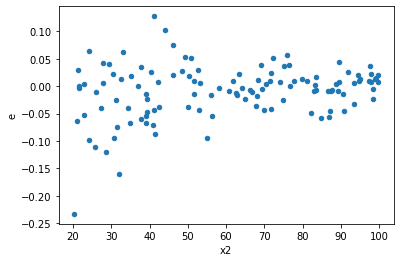

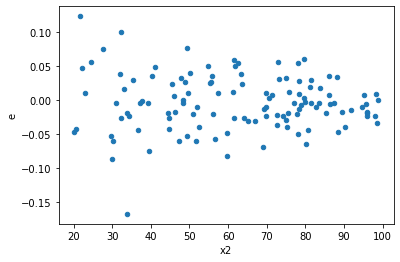

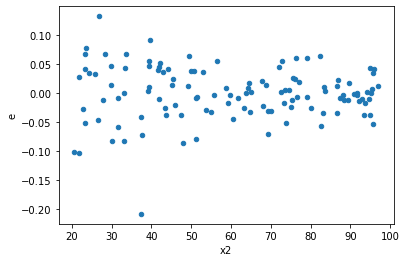

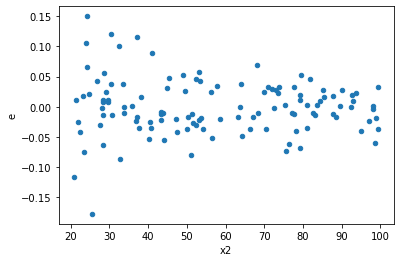

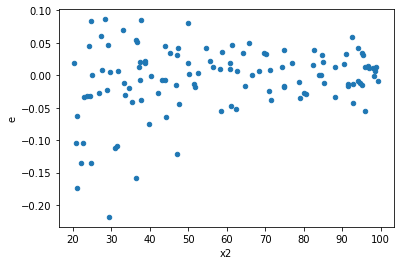

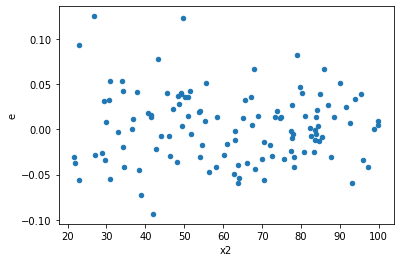

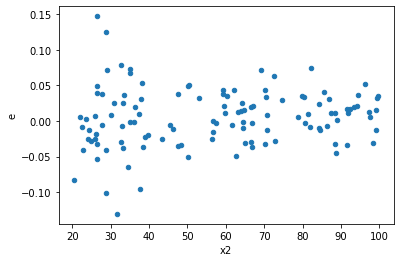

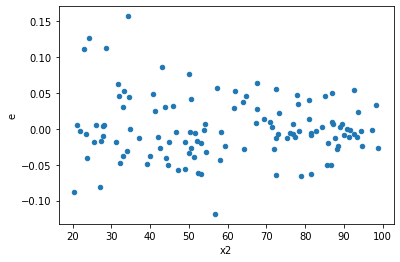

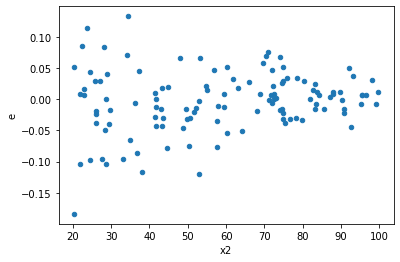

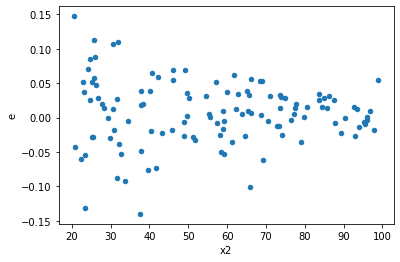

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.1717661800506343,0.0265606440347168,0.003734047392405093,0.0005774053051025392,0.15463255937162423,3.349396403388071e-09,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.09796012768823717,0.03513588416105888,0.0021295679932225474,0.0007638235687186713,0.3586753609885087,0.0007064370503068138,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.12501013732299152,0.08508360161547401,0.002717611680934598,0.0018496435133798699,0.6806136161233196,0.19574580312752107,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,0.16350112226044838,0.042738280142143883,0.0035543722230532257,0.0009290930465683453,0.26139441461486806,1.2324235058996646e-05,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.168862120282314,0.03442205074456976,0.003670915658311174,0.0007483054509689078,0.2038470835674743,3.1038767858604686e-07,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.07481291081735085,0.061029016272345145,0.0016263676264641489,0.0013267177450509815,0.8157551364542162,0.49255613747905996,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,0.10703922422667132,0.04507594245147175,0.0023269396571015503,0.0009799117924232988,0.4211161167986121,0.004058907338641689,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.12117251949804633,0.06246725612979093,0.002634185206479268,0.0013579838289084984,0.5155232918202884,0.02676850541061805,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,0.16427429034874264,0.059329952535137676,0.003571180224972666,0.0012897815768508191,0.3611639557789865,0.0007650836775525226,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    756
Reject001=1 : Homoscedasticity      244
Name: Result_test, dtype: int64